In [1]:
import numpy as np
from pandas.io.parsers import read_csv

valores=read_csv("data3.csv",header=None).to_numpy()

In [51]:
X = valores[:, 0:2] #[fila[0:2] for fila in valores]
Y = valores[:,2]

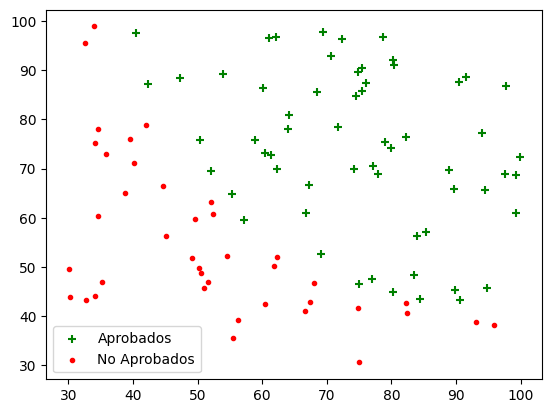

In [53]:
import matplotlib.pyplot as plt

pos = np.where(Y == 1)
plt.scatter(X[pos,0], X[pos,1], marker='+', c='g', label = "Aprobados")

neg = np.where(Y == 0)
plt.scatter(X[neg,0], X[neg,1], marker='.', c='r', label = "No Aprobados")

plt.legend()
plt.show()


In [58]:
def func_sigmoide(z):
    return 1/(1+np.exp(-z))

a = np.array([[0,1,2,3,4,5,6,7,8,9], [0,1,2,3,4,5,6,7,8,9]])

func_sigmoide(a)

array([[0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
        0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661],
       [0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
        0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661]])

In [121]:
def func_coste(X, Y, w, b):
    m = len(Y)
    z = np.dot(X, w) + b
    f = func_sigmoide(z)
    coste = (-1/m) * (np.dot(Y, np.log(f)) + np.dot((1-Y), np.log(1-f)))
    return coste

def descenso_gradiente(alpha, w, b, X, Y, iter):
    m = len(Y)
    for i in range(iter):
        z = np.dot(X, w) + b
        f = func_sigmoide(z)
        f = f >= 0.5 
        f = f.astype(int)
        w = w - alpha * (1/m) * np.dot(X.T, (f - Y))
        b = b - alpha * (1/m) * np.sum(f - Y)
    return w, b


w= np.array([0.0,0.0])
b = 0
w, b = descenso_gradiente(0.01, w, b, X, Y, 1000)
w,b
    

(array([ 0.17307344, -0.33652855]), -0.7709000000000032)

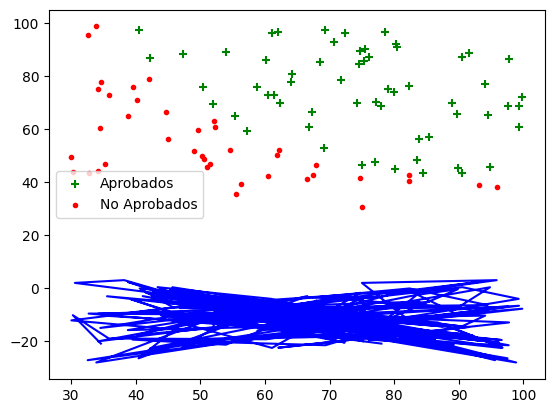

array([-21.03600114, -10.30099479, -19.1003369 , -19.40018267,
       -12.44796646, -11.92024919, -22.6738099 ,  -3.45286396,
       -17.01973904,  -0.80805119,   2.95629168,   1.91310008,
       -12.26409955, -21.65086204, -19.5164216 , -21.45076484,
        -6.56536649,  -4.71977695, -19.81390473,  -3.45858725,
        -3.52694905,  -7.39359729,  -8.4660459 ,  -9.72746961,
       -10.49547791, -13.53511396,  -1.97586743,   2.28719423,
        -6.98234879, -15.93101   , -14.6497082 ,  -5.1892676 ,
       -12.99664058, -15.12936272, -17.75694168,  -8.88647779,
       -28.17341595, -16.89144033,  -1.81750793, -20.17426103,
        -5.19888937,  -7.61783827,  -6.49107571,  -0.184259  ,
        -7.3565374 ,  -7.52181772, -11.12203197, -13.0356215 ,
       -22.59317371, -14.77226985, -11.89258257,  -4.11737784,
         0.29815493, -15.12071738,  -8.8282925 , -12.31618293,
        -7.0449196 , -27.30429287, -11.41838547, -14.74670311,
       -16.58258956, -10.4875566 ,  -4.24746479, -12.25

In [128]:
pos = np.where(Y == 1)
plt.scatter(X[pos,0], X[pos,1], marker='+', c='g', label = "Aprobados")

neg = np.where(Y == 0)
plt.scatter(X[neg,0], X[neg,1], marker='.', c='r', label = "No Aprobados")

def recta(w,b,X):
    return np.sum(X*w, axis=1) + b

plt.legend()
plt.plot(X, recta(w,b,X), color="b")
plt.show()